<a href="https://colab.research.google.com/github/khoa-nd/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [2]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = phi0 + phi1 * x

  return y

In [5]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

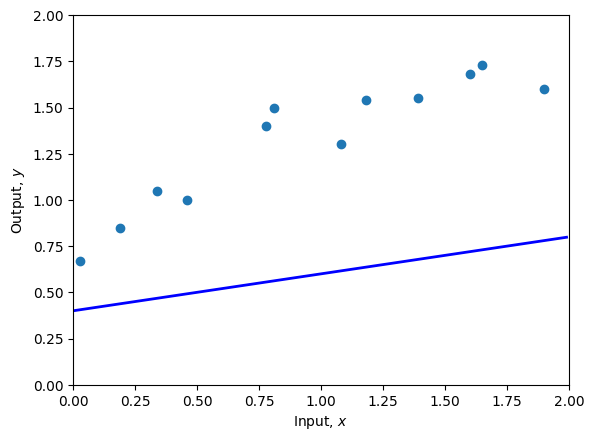

In [6]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [12]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):
  n = len(x)
  # TODO Replace this line with the loss calculation (equation 2.5)
  loss = sum((y[i] - (phi0 + phi1 * x[i])) ** 2 for i in range(n)) / n


  return loss

In [13]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 0.59, Ground truth =7.07


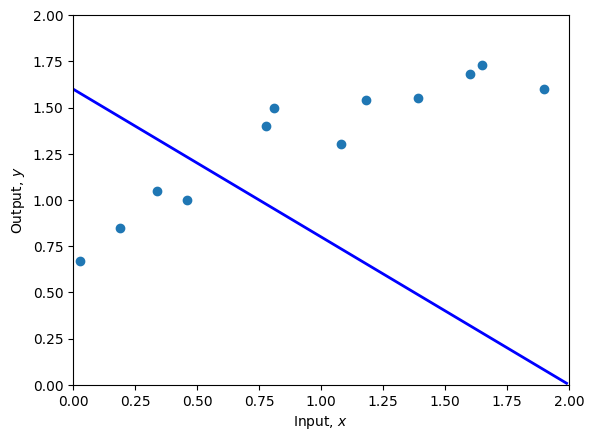

Your Loss = 0.86, Ground truth =10.28


In [14]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

Loss: 0.8144, phi0: 1.6097, phi1: -0.7816
Loss: 0.7755, phi0: 1.6188, phi1: -0.7639
Loss: 0.7396, phi0: 1.6274, phi1: -0.7468
Loss: 0.7064, phi0: 1.6355, phi1: -0.7303
Loss: 0.6758, phi0: 1.6431, phi1: -0.7144
Loss: 0.6475, phi0: 1.6503, phi1: -0.6990
Loss: 0.6213, phi0: 1.6570, phi1: -0.6841
Loss: 0.5971, phi0: 1.6633, phi1: -0.6697
Loss: 0.5747, phi0: 1.6693, phi1: -0.6558
Loss: 0.5540, phi0: 1.6748, phi1: -0.6424
Loss: 0.5348, phi0: 1.6800, phi1: -0.6294
Loss: 0.5170, phi0: 1.6848, phi1: -0.6168
Loss: 0.5005, phi0: 1.6893, phi1: -0.6046
Loss: 0.4852, phi0: 1.6934, phi1: -0.5929
Loss: 0.4710, phi0: 1.6973, phi1: -0.5815
Loss: 0.4577, phi0: 1.7009, phi1: -0.5704
Loss: 0.4454, phi0: 1.7041, phi1: -0.5597
Loss: 0.4340, phi0: 1.7071, phi1: -0.5493
Loss: 0.4233, phi0: 1.7099, phi1: -0.5393
Loss: 0.4133, phi0: 1.7124, phi1: -0.5295
Loss: 0.4040, phi0: 1.7147, phi1: -0.5201
Loss: 0.3953, phi0: 1.7167, phi1: -0.5109
Loss: 0.3872, phi0: 1.7186, phi1: -0.5020
Loss: 0.3796, phi0: 1.7202, phi1: 

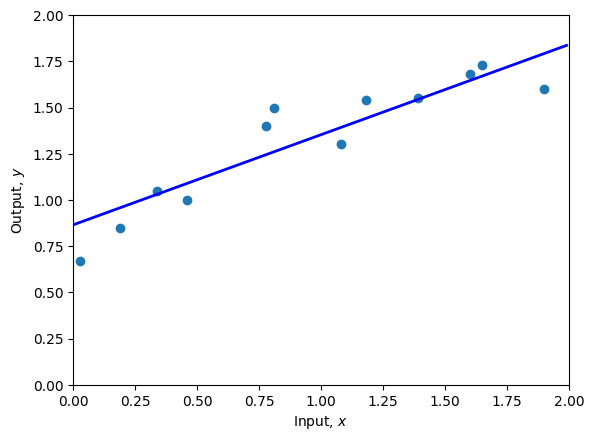

Optimized Loss = 0.02


In [15]:
# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
def gradient_descent(x, y, phi0, phi1, learning_rate, iterations):
    n = len(x)
    for _ in range(iterations):
        # Calculate the gradients
        phi0_grad = -2/n * sum((y[i] - (phi0 + phi1 * x[i])) for i in range(n))
        phi1_grad = -2/n * sum((y[i] - (phi0 + phi1 * x[i])) * x[i] for i in range(n))

        # Update the parameters
        phi0 -= learning_rate * phi0_grad
        phi1 -= learning_rate * phi1_grad

        # Optionally print loss to monitor progress
        current_loss = compute_loss(x, y, phi0, phi1)
        print(f'Loss: {current_loss:.4f}, phi0: {phi0:.4f}, phi1: {phi1:.4f}')

    return phi0, phi1

# Example usage with a small learning rate and a number of iterations:
phi0, phi1 = 1.60, -0.8
learning_rate = 0.01
iterations = 1000

phi0, phi1 = gradient_descent(x, y, phi0, phi1, learning_rate, iterations)
plot(x, y, phi0, phi1)
print(f'Optimized Loss = {compute_loss(x, y, phi0, phi1):3.2f}')

# Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

In [16]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


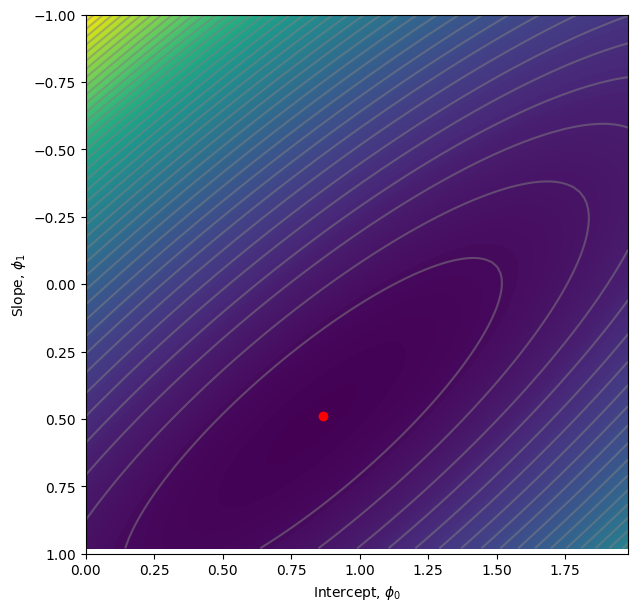

In [17]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()